# Initialization and Global Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import scipy as sp

from sklearn.metrics import roc_curve, precision_recall_curve 

In [11]:
labelsize = 16
legendsize = 16
axissize = 14
lw = 2
labelpad = 10
figsize=(6, 5)
columns = ['Spatial', 'Cluster', 'Combined']

In [12]:
def make_figure_axes(figsize=None):
    fig, ax = plt.subplots(figsize=figsize)
    ax.tick_params(axis='both', direction='in', 
                   reset=True, labelsize=axissize, which='both')
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)
    
    return fig, ax

# Simulation Introduction

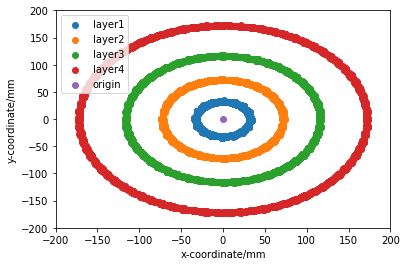

In [36]:
x_2 = np.load('x_hits_layerid2.npy')
x_4 = np.load('x_hits_layerid4.npy')
x_6 = np.load('x_hits_layerid6.npy')
x_8 = np.load('x_hits_layerid8.npy')

y_2 = np.load('y_hits_layerid2.npy')
y_4 = np.load('y_hits_layerid4.npy')
y_6 = np.load('y_hits_layerid6.npy')
y_8 = np.load('y_hits_layerid8.npy')

plt.scatter(x_2, y_2)
plt.scatter(x_4, y_4)
plt.scatter(x_6, y_6)
plt.scatter(x_8, y_8)
plt.scatter(0, 0)

plt.xlabel('x-coordinate/mm')
plt.ylabel('y-coordinate/mm')
plt.legend(['layer1', 'layer2', 'layer3', 'layer4', 'origin'])
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.savefig('hits distribution in the X-Y plane.pdf', bbox_inches='tight')

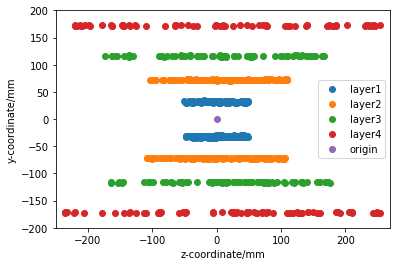

In [37]:
zz_2 = np.load('zz_hits_layerid2.npy')
zz_4 = np.load('zz_hits_layerid4.npy')
zz_6 = np.load('zz_hits_layerid6.npy')
zz_8 = np.load('zz_hits_layerid8.npy')

yy_2 = np.load('yy_hits_layerid2.npy')
yy_4 = np.load('yy_hits_layerid4.npy')
yy_6 = np.load('yy_hits_layerid6.npy')
yy_8 = np.load('yy_hits_layerid8.npy')

plt.scatter(zz_2, yy_2)
plt.scatter(zz_4, yy_4)
plt.scatter(zz_6, yy_6)
plt.scatter(zz_8, yy_8)
plt.scatter(0, 0)

plt.xlabel('z-coordinate/mm')
plt.ylabel('y-coordinate/mm')
plt.legend(['layer1', 'layer2', 'layer3', 'layer4', 'origin'])
plt.xlim([-250, 270])
plt.ylim([-200, 200])
plt.savefig('hits distribution in the Z-Y plane.pdf', bbox_inches='tight')

In [5]:
particle_x_2 = np.load('sample_particle_x_2.npy')
particle_x_4 = np.load('sample_particle_x_4.npy')
particle_x_6 = np.load('sample_particle_x_6.npy')
particle_x_8 = np.load('sample_particle_x_8.npy')

particle_y_2 = np.load('sample_particle_y_2.npy')
particle_y_4 = np.load('sample_particle_y_4.npy')
particle_y_6 = np.load('sample_particle_y_6.npy')
particle_y_8 = np.load('sample_particle_y_8.npy')

particle_z_2 = np.load('sample_particle_z_2.npy')
particle_z_4 = np.load('sample_particle_z_4.npy')
particle_z_6 = np.load('sample_particle_z_6.npy')
particle_z_8 = np.load('sample_particle_z_8.npy')

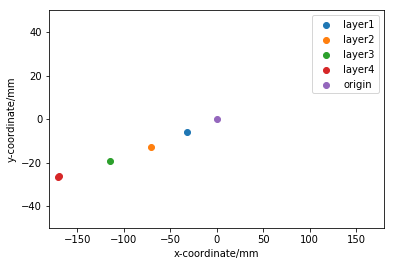

In [35]:
plt.scatter(particle_x_2, particle_y_2)
plt.scatter(particle_x_4, particle_y_4)
plt.scatter(particle_x_6, particle_y_6)
plt.scatter(particle_x_8, particle_y_8)
plt.scatter(0, 0)
plt.xlim([-180, 180])
plt.ylim([-50, 50])
plt.xlabel('x-coordinate/mm')
plt.ylabel('y-coordinate/mm')
plt.legend(['layer1', 'layer2', 'layer3', 'layer4', 'origin'])
plt.savefig('sample hits of one particle in x-y.pdf')


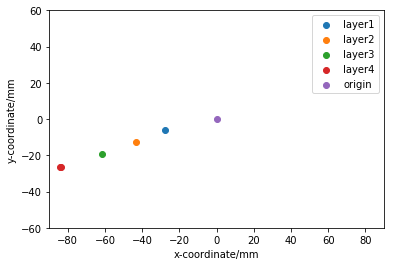

In [34]:
plt.scatter(particle_z_2, particle_y_2)
plt.scatter(particle_z_4, particle_y_4)
plt.scatter(particle_z_6, particle_y_6)
plt.scatter(particle_z_8, particle_y_8)
plt.scatter(0, 0)
plt.xlim([-90, 90])
plt.ylim([-60, 60])
plt.xlabel('x-coordinate/mm')
plt.ylabel('y-coordinate/mm')
plt.legend(['layer1', 'layer2', 'layer3', 'layer4', 'origin'])
plt.savefig('sample hits of one particle in z-y.pdf')

# Singlet Results

In [5]:
single_total = np.load('single_total.npy')
single_xyz = np.load('single_xyz.npy')
single_cluster = np.load('single_cluster.npy')

total_prob = np.load('singlet_total_prob.npy')
total_frac = np.load('singlet_total_frac.npy')
total_frac_out = np.load('singley_total_frac_out.npy')

xyz_prob = np.load('singlet_xyz_prob.npy')
xyz_frac = np.load('singlet_xyz_frac.npy')
xyz_frac_out = np.load('singley_xyz_frac_out.npy')

cluster_prob = np.load('singlet_cluster_prob.npy')
cluster_frac = np.load('singlet_cluster_frac.npy')
cluster_frac_out = np.load('singley_cluster_frac_out.npy')

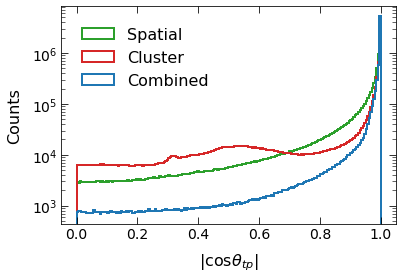

In [13]:
bins = np.linspace(0, 1, 200)
_, ax = make_figure_axes()
ax.hist(np.abs(single_xyz), histtype='step', color='tab:green', label='Spatial', bins=bins, lw=lw)
ax.hist(np.abs(single_cluster), histtype='step', color='tab:red', label='Cluster', bins=bins, lw=lw)
ax.hist(np.abs(single_total), histtype='step', color='tab:blue', label='Combined', bins=bins, lw=lw)
ax.set_yscale('log')
ax.set_xlabel(r'$|\cos\theta_{tp}|$', fontsize=labelsize, labelpad=labelpad)
ax.set_ylabel('Counts', fontsize=labelsize, labelpad=labelpad)
ax.legend(loc="upper left", frameon=False, fontsize=legendsize, borderpad=0.8)
plt.savefig('singlet_cosine.pdf', bbox_inches='tight')
plt.show()

In [14]:
angle_total = np.arccos(np.abs(single_total))*180/np.pi
angle_xyz = np.arccos(np.abs(single_xyz))*180/np.pi
angle_cluster = np.arccos(np.abs(single_cluster))*180/np.pi

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


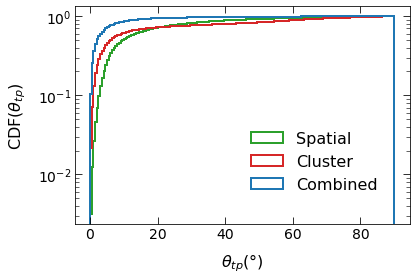

In [15]:
bins = np.linspace(0, 90, 180)
_, ax = make_figure_axes()
ax.hist(angle_xyz, histtype='step', color='tab:green', label='Spatial', bins=bins, lw=lw, density=True, cumulative=True)
ax.hist(angle_cluster, histtype='step', color='tab:red', label='Cluster', bins=bins, lw=lw, density=True, cumulative=True)
ax.hist(angle_total, histtype='step', color='tab:blue', label='Combined', bins=bins, lw=lw, density=True, cumulative=True)
ax.set_yscale('log')
ax.set_xlabel(r'$\theta_{tp} (\degree)$', fontsize=labelsize, labelpad=labelpad)
ax.set_ylabel(r'CDF$(\theta_{tp})$', fontsize=labelsize, labelpad=labelpad)
ax.legend(loc="lower right", frameon=False, fontsize=legendsize, borderpad=1.5)
plt.savefig('singlet_cdf.pdf', bbox_inches='tight')
plt.show()

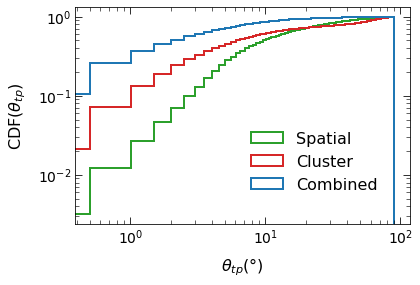

In [16]:
bins = np.linspace(0, 90, 180)
_, ax = make_figure_axes()
ax.hist(angle_xyz, histtype='step', color='tab:green', label='Spatial', bins=bins, lw=lw, density=True, cumulative=True)
ax.hist(angle_cluster, histtype='step', color='tab:red', label='Cluster', bins=bins, lw=lw, density=True, cumulative=True)
ax.hist(angle_total, histtype='step', color='tab:blue', label='Combined', bins=bins, lw=lw, density=True, cumulative=True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{tp} (\degree)$', fontsize=labelsize, labelpad=labelpad)
ax.set_ylabel(r'CDF$(\theta_{tp})$', fontsize=labelsize, labelpad=labelpad)
ax.legend(loc="lower right", frameon=False, fontsize=legendsize, borderpad=1.5)
plt.savefig('singlet_cdf_log.pdf', bbox_inches='tight')
plt.show()

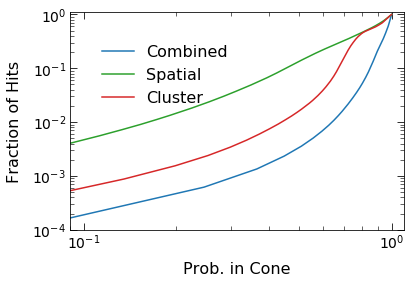

In [17]:
_, ax = make_figure_axes()
ax.plot(total_prob, total_frac/total_frac[-1], color='tab:blue', label='Combined')
ax.plot(xyz_prob, xyz_frac/xyz_frac[-1], color='tab:green', label='Spatial')
ax.plot(cluster_prob, cluster_frac/cluster_frac[-1], color='tab:red', label='Cluster')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.09, 1.1])
ax.set_ylim([1e-4, 1.1])
ax.set_xlabel(r'Prob. in Cone', fontsize=labelsize, labelpad=labelpad)
ax.set_ylabel(r'Fraction of Hits', fontsize=labelsize, labelpad=labelpad)
ax.legend(loc="upper left", frameon=False, fontsize=legendsize, borderpad=1.5)
plt.savefig('singlet_prob.pdf', bbox_inches='tight')
plt.show()

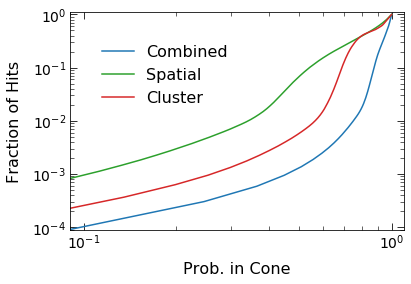

In [18]:
_, ax = make_figure_axes()
ax.plot(total_prob, total_frac_out/total_frac[-1], color='tab:blue', label='Combined')
ax.plot(xyz_prob, xyz_frac_out/xyz_frac[-1], color='tab:green', label='Spatial')
ax.plot(cluster_prob, cluster_frac_out/cluster_frac[-1], color='tab:red', label='Cluster')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.09, 1.1])
ax.set_ylim([0.9e-4, 1.1])
ax.set_xlabel(r'Prob. in Cone', fontsize=labelsize, labelpad=labelpad)
ax.set_ylabel(r'Fraction of Hits', fontsize=labelsize, labelpad=labelpad)
ax.legend(loc="upper left", frameon=False, fontsize=legendsize, borderpad=1.5)
plt.savefig('singlet_prob_out.pdf', bbox_inches='tight')
plt.show()

# Doublet Results

In [22]:
filename = 'doublets_forpaper.npz'

pt_range = [0, 0.5, 1., 1000]  # GeV
eta_range = [0, 1, 1.5, 2.1, 3]
pt_eta_labels = []
for ipt in range(len(pt_range)-1):
    pt_low, pt_hi = pt_range[ipt:ipt+2]
    for ieta in range(len(eta_range)-1):
        eta_low, eta_hi = eta_range[ieta:ieta+2]
        pt_eta_labels.append("$\eta$ [{}, {}], $p_T$ [{}, {}] GeV".format(
            eta_low, eta_hi, pt_low, pt_hi))

In [33]:
def make_plot_err(outname, input_list, err_list, xlabel, columns=columns, logx=False):
    _, ax = plt.subplots(figsize=(10, 8), constrained_layout=True)
    y_pos = np.arange(len(pt_eta_labels))

    height=0.25
    positions = [y_pos+height, y_pos, y_pos-height]

    for idx in range(3):
        ax.barh(positions[idx], input_list[:, idx], height, label=columns[idx])

    for idx in range(3):
        if idx == 0:
            label='Uncertainty'
        else:
            label=None
        ax.barh(
            positions[idx], 2*err_list[:, idx], height,
            left=input_list[:, idx]-err_list[:, idx],
            color = 'darkgrey', hatch = '////////', alpha=0.3, label=label)

    ax.set_xlabel(xlabel, fontsize=16)
    ax.tick_params(width=2, grid_alpha=0.5, labelsize=14)
    ax.set_ylabel('$\eta$-$p_T$ bins', fontsize=16)
    ax.legend(fontsize=16, frameon=False)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pt_eta_labels)
    plt.savefig("{}.pdf".format(outname))

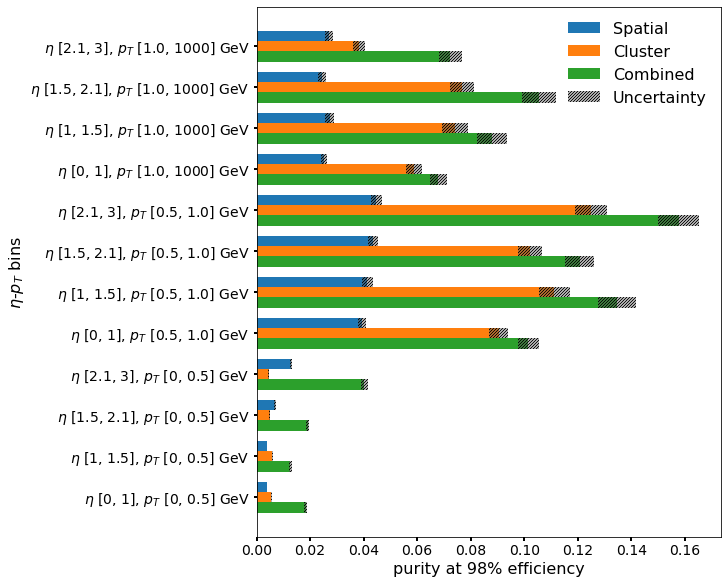

In [34]:
doublet_array = np.load(filename)
make_plot_err(
    "doublets_purity_err", doublet_array['purities'], doublet_array['purity_errs'],\
    "purity at 98% efficiency", columns=columns)

# Triple Results

In [13]:
n1 = np.load('dph1_sig.npy')
bin1 = np.load('dph1_sig_bin.npy')
n2 = np.load('dph1_bkg.npy')
bin2 = np.load('dph1_bkg_bin.npy')


n3 = np.load('dz_sig.npy')
bin3 = np.load('dz_sig_bin.npy')
n4 = np.load('dz_bkg.npy')
bin4 = np.load('dz_bkg_bin.npy')

n5 = np.load('dr_sig.npy')
bin5 = np.load('dr_sig_bin.npy')
n6 = np.load('dr_bkg.npy')
bin6 = np.load('dr_bkg_bin.npy')


n7 = np.load('phislope_sig.npy')
bin7 = np.load('phislope_sig_bin.npy')
n8 = np.load('phislope_bkg.npy')
bin8 = np.load('phislope_bkg_bin.npy')


n9 = np.load('z0_sig.npy')
bin9 = np.load('z0_sig_bin.npy')
n10 = np.load('z0_bkg.npy')
bin10 = np.load('z0_bkg_bin.npy')


n11 = np.load('deta_sig.npy')
bin11 = np.load('deta_sig_bin.npy')

n12 = np.load('deta_bkg.npy')
bin12 = np.load('deta_bkg_bin.npy')

In [14]:
array1 = []
for i, j in zip(bin1[:-1], n1):
    while j>=1:
        array1.append(i)
        j = j-1
array1 = np.array(array1)

array2 = []
for i, j in zip(bin2[:-1], n2):
    while j>=1:
        array2.append(i)
        j = j-1
array2 = np.array(array2)

array3 = []
for i, j in zip(bin3[:-1], n3):
    while j>=1:
        array3.append(i)
        j = j-1
array3 = np.array(array3)

array4 = []
for i, j in zip(bin4[:-1], n4):
    while j>=1:
        array4.append(i)
        j = j-1
array4 = np.array(array4)

array5 = []
for i, j in zip(bin5[:-1], n5):
    while j>=1:
        array5.append(i)
        j = j-1
array5 = np.array(array5)

array6 = []
for i, j in zip(bin6[:-1], n6):
    while j>=1:
        array6.append(i)
        j = j-1
array6 = np.array(array6)

array7 = []
for i, j in zip(bin7[:-1], n7):
    while j>=1:
        array7.append(i)
        j = j-1
array7 = np.array(array7)

array8 = []
for i, j in zip(bin8[:-1], n8):
    while j>=1:
        array8.append(i)
        j = j-1
array8 = np.array(array8)

array9 = []
for i, j in zip(bin9[:-1], n9):
    while j>=1:
        array9.append(i)
        j = j-1
array9 = np.array(array9)

array10 = []
for i, j in zip(bin10[:-1], n10):
    while j>=1:
        array10.append(i)
        j = j-1
array10 = np.array(array10)

array11 = []
for i, j in zip(bin11[:-1], n11):
    while j>=1:
        array11.append(i)
        j = j-1
array11 = np.array(array11)

array12 = []
for i, j in zip(bin12[:-1], n12):
    while j>=1:
        array12.append(i)
        j = j-1
array12 = np.array(array12)

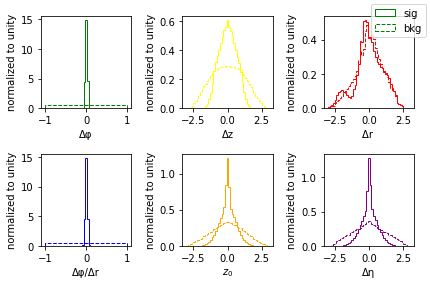

In [32]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].hist(array1, histtype='step', color = 'green', density = True, bins = bin1, label = 'sig')
axs[0, 0].hist(array2, histtype='step', color='green', linestyle='dashed', density = True, bins = bin2, label = 'bkg')
axs[0, 0].set_ylabel('normalized to unity')
axs[0, 0].set_xlabel('\u0394\u03C6')


axs[0, 1].hist(array3, histtype='step', color = 'yellow', label='signal_dz', density = True, bins = bin3)
axs[0, 1].hist(array4, histtype='step', color='yellow', linestyle='dashed', label='bkg_dz', density = True, bins = bin4)
axs[0, 1].set_xlabel('\u0394z')
axs[0, 1].set_ylabel('normalized to unity')

axs[0, 2].hist(array5, histtype='step', color = 'red', label='signal_dr', density = True, bins = bin5)
axs[0, 2].hist(array6, histtype='step', color='red', linestyle='dashed', label='bkg_dr', density = True, bins = bin6)
axs[0, 2].set_xlabel('\u0394r ')
axs[0, 2].set_ylabel('normalized to unity')


axs[1, 0].hist(array7, histtype='step', color = 'blue', label='signal_phislope', density = True, bins = bin7)
axs[1, 0].hist(array8, histtype='step', color='blue', linestyle='dashed', label='bkg_phislope', density = True, bins = bin8)
axs[1, 0].set_xlabel('\u0394\u03C6/\u0394r')
axs[1, 0].set_ylabel('normalized to unity')


axs[1, 1].hist(array9, histtype='step', color = 'orange', label='signal_z0', density = True, bins = bin9)
axs[1, 1].hist(array10, histtype='step', color='orange', linestyle='dashed', label='bkg_z0', density = True, bins = bin10)
axs[1, 1].set_xlabel('$z_0$')
axs[1, 1].set_ylabel('normalized to unity')


axs[1, 2].hist(array11, histtype='step', color = 'purple', label='signal_deta', density = True, bins = bin11)
axs[1, 2].hist(array12, histtype='step', color='purple', linestyle='dashed', label='bkg_deta', density = True, bins = bin12)
axs[1, 2].set_xlabel('\u0394\u03B7')
axs[1, 2].set_ylabel('normalized to unity')

plt.tight_layout()

fig.legend(['sig', 'bkg'], loc='upper right')
fig.savefig('spatial parameters distribution.pdf', bbox_inches='tight')

In [16]:
num_triplets = np.load('numbers_of_spatial_triplets_testing.npy')
num_triplets_c = np.load('numbers_of_cluster_triplets_testing.npy')
num_triplets_t = np.load('numbers_of_combined_triplets_testing.npy')

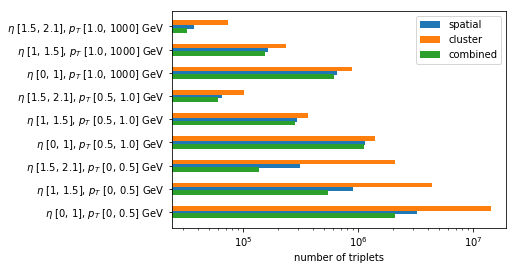

In [19]:
fig, ax = plt.subplots()
data_range = ('$\eta$ [0, 1], $p_T$ [0, 0.5] GeV', '$\eta$ [1, 1.5], $p_T$ [0, 0.5] GeV', '$\eta$ [1.5, 2.1], $p_T$ [0, 0.5] GeV',
              '$\eta$ [0, 1], $p_T$ [0.5, 1.0] GeV', '$\eta$ [1, 1.5], $p_T$ [0.5, 1.0] GeV', '$\eta$ [1.5, 2.1], $p_T$ [0.5, 1.0] GeV', 
              '$\eta$ [0, 1], $p_T$ [1.0, 1000] GeV', '$\eta$ [1, 1.5], $p_T$ [1.0, 1000] GeV', '$\eta$ [1.5, 2.1], $p_T$ [1.0, 1000] GeV')
y_pos = np.arange(len(data_range))
height = 0.2


rects1 = ax.barh(y_pos, num_triplets, height, align='center')
rects2 = ax.barh(y_pos + 0.8*height, num_triplets_c, height, align='center')
rects3 = ax.barh(y_pos - 0.8*height, num_triplets_t, height, align='center')                 

ax.set_yticks(y_pos)
ax.set_yticklabels(data_range)

plt.legend(['spatial', 'cluster', 'combined'])
plt.xlabel('number of triplets')
plt.xscale('log')
plt.show()
fig.savefig('pt eta distribution.pdf', bbox_inches='tight')

In [18]:
bins = np.load('prediction_scores_bins.npy')

m1 = np.load('prediction_scores_spatial_sig_.npy')
m2 = np.load('prediction_scores_spatial_bkg_.npy')
m3 = np.load('prediction_scores_cluster_sig_.npy')
m4 = np.load('prediction_scores_cluster_bkg_.npy')
m5 = np.load('prediction_scores_combined_sig_.npy')
m6 = np.load('prediction_scores_combined_bkg_.npy')

In [20]:
predictions_spatial_sig = []
for i, j in zip(bins[:-1], m1):
    while j>=1:
        predictions_spatial_sig.append(i)
        j = j-1
predictions_spatial_sig = np.array(predictions_spatial_sig)

predictions_spatial_bkg = []
for i, j in zip(bins[:-1], m2):
    while j>=1:
        predictions_spatial_bkg.append(i)
        j = j-1
predictions_spatial_bkg = np.array(predictions_spatial_bkg)

predictions_cluster_sig = []
for i, j in zip(bins[:-1], m3):
    while j>=1:
        predictions_cluster_sig.append(i)
        j = j-1
predictions_cluster_sig = np.array(predictions_cluster_sig)

predictions_cluster_bkg = []
for i, j in zip(bins[:-1], m4):
    while j>=1:
        predictions_cluster_bkg.append(i)
        j = j-1
predictions_cluster_bkg = np.array(predictions_cluster_bkg)

predictions_combined_sig = []
for i, j in zip(bins[:-1], m5):
    while j>=1:
        predictions_combined_sig.append(i)
        j = j-1
predictions_combined_sig = np.array(predictions_combined_sig)

predictions_combined_bkg = []
for i, j in zip(bins[:-1], m6):
    while j>=1:
        predictions_combined_bkg.append(i)
        j = j-1
predictions_combined_bkg = np.array(predictions_combined_bkg)

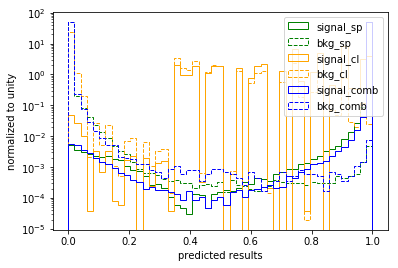

In [21]:
bb = np.linspace(0, 1, 50)
plt.hist(predictions_spatial_sig, histtype='step', color='green', label='signal_sp', density=True, bins = bb)
plt.hist(predictions_spatial_bkg, histtype='step', color='green', linestyle='dashed', label='bkg_sp', density =True, bins = bb)
plt.hist(predictions_cluster_sig, histtype='step', color='orange', label='signal_cl', density =True, bins = bb)
plt.hist(predictions_cluster_bkg, histtype='step', color='orange', linestyle='dashed', label='bkg_cl', density =True, bins = bb)
plt.hist(predictions_combined_sig, histtype='step', color='blue', label='signal_comb', density =True, bins = bb)
plt.hist(predictions_combined_bkg, histtype='step', color='blue', linestyle='dashed', label='bkg_comb', density =True, bins = bb)
plt.yscale('log')
plt.xlabel('predicted results')
plt.ylabel('normalized to unity')
plt.legend()
plt.savefig('prediction score distribution.pdf', bbox_inches='tight')

In [22]:
tpr_clasify, fpr_clasify = np.load('tpr_spatial.npy'), np.load('fpr_spatial.npy')
tpr_clasify_c, fpr_clasify_c = np.load('tpr_cluster.npy'), np.load('fpr_cluster.npy')
tpr_clasify_t, fpr_clasify_t = np.load('tpr_combined.npy'), np.load('fpr_combined.npy')

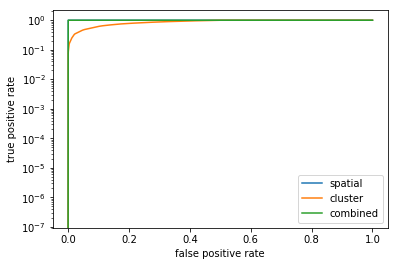

In [23]:
plt.plot(fpr_clasify, tpr_clasify)
plt.plot(fpr_clasify_c, tpr_clasify_c)
plt.plot(fpr_clasify_t, tpr_clasify_t)
plt.yscale('log')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(['spatial', 'cluster', 'combined'])
plt.savefig('roc curve.pdf', bbox_inches='tight')

In [24]:
pur, eff = np.load('overall_purity_spatial.npy'), np.load('overall_efficiency_spatial.npy')
pur_c, eff_c = np.load('overall_purity_cluster.npy'), np.load('overall_efficiency_cluster.npy')
pur_t, eff_t = np.load('overall_purity_combined.npy'), np.load('overall_efficiency_combined.npy')

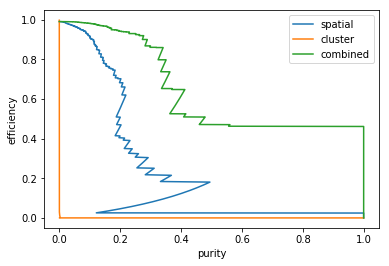

In [25]:
plt.plot(pur, eff)
plt.plot(pur_c, eff_c)
plt.plot(pur_t, eff_t)
plt.ylabel('efficiency')
plt.xlabel('purity')
plt.legend(['spatial', 'cluster', 'combined'])
plt.savefig('purity vs efficiency.pdf', bbox_inches='tight')

In [26]:
purities = np.load('purity_spatial.npy')
purities_c = np.load('purity_cluster.npy')
purities_t = np.load('purity_combined.npy')
purities_uncertainty_ = np.load('purity_spatial_uncertainty.npy')
purities_c_uncertainty_ = np.load('purity_cluster_uncertainty.npy')
purities_t_uncertainty_ = np.load('purity_combined_uncertainty.npy')

purities_uncertainty = np.array([i[1] - i[0] for i in purities_uncertainty_])
purities_c_uncertainty = np.array([i[1] - i[0] for i in purities_c_uncertainty_])
purities_t_uncertainty = np.array([i[1] - i[0] for i in purities_t_uncertainty_])

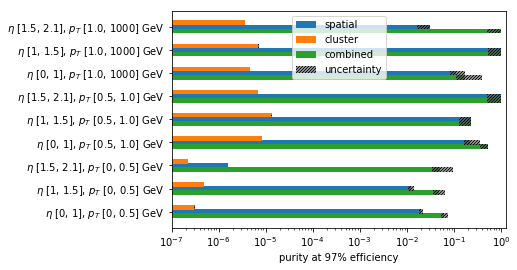

In [31]:
fig, ax = plt.subplots()
data_range = ('$\eta$ [0, 1], $p_T$ [0, 0.5] GeV', '$\eta$ [1, 1.5], $p_T$ [0, 0.5] GeV', '$\eta$ [1.5, 2.1], $p_T$ [0, 0.5] GeV', 
              '$\eta$ [0, 1], $p_T$ [0.5, 1.0] GeV', '$\eta$ [1, 1.5], $p_T$ [0.5, 1.0] GeV', '$\eta$ [1.5, 2.1], $p_T$ [0.5, 1.0] GeV',
              '$\eta$ [0, 1], $p_T$ [1.0, 1000] GeV', '$\eta$ [1, 1.5], $p_T$ [1.0, 1000] GeV', '$\eta$ [1.5, 2.1], $p_T$ [1.0, 1000] GeV')
y_pos = np.arange(len(data_range))
height = 0.2

rects1 = ax.barh(y_pos, np.array(purities), height, align='center')
rects2 = ax.barh(y_pos + 0.9*height, np.array(purities_c), height, align='center')
rects3 = ax.barh(y_pos - 0.9*height, np.array(purities_t), height, align='center') 
rects1_ = ax.barh(y_pos, np.array(purities_uncertainty), height, align='center', left = np.array(purities_uncertainty_[:, 0]), color = 'C7', hatch = '////////', alpha = 0.5)
rects2_ = ax.barh(y_pos + 0.9*height, np.array(purities_c_uncertainty), height, align='center', left = np.array(purities_c_uncertainty_[:, 0]), color = 'C7', hatch = '////////', alpha = 0.5)
rects3_ = ax.barh(y_pos - 0.9*height, np.array(purities_t_uncertainty), height, align='center', left = np.array(purities_t_uncertainty_[:, 0]), color = 'C7', hatch = '////////', alpha = 0.5)


ax.set_yticks(y_pos)
ax.set_yticklabels(data_range)

plt.xlabel('purity at 97% efficiency')
plt.legend(['spatial', 'cluster', 'combined', 'uncertainty'], loc = 'upper center')
plt.xscale('log')
plt.xlim([0.0000001, 1.3])

plt.show()
fig.savefig('purity distribution.pdf', bbox_inches='tight')